<a href="https://colab.research.google.com/github/jabedkhanjb/Tesla-Stock-Price-Prediction-Facebook-Prophet/blob/main/Tesla_Stock_Price_Prediction_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla Stock Price Prediction using Facebook Prophet

**Importing all the necessary Libraries**

In [6]:
# !pip install Prophet

In [43]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as pyo # this module is usefull for offline plotly chart

In [8]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.default = "colab"

## Importing the Dataset & Exploring it

In [9]:
from datetime import datetime
import yfinance as yf

In [10]:
# Define the start and end dates
end = datetime.now()
start = '2020-03-16'

# Downloading Stock data
df = yf.download('TSLA', start=start, end=end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
...,...,...,...,...,...,...
2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,969.000000,969.000000,969.000000,969.000000,969.000000,9.690000e+02
mean,218.010391,222.897496,212.702034,217.919603,217.919603,1.234182e+08
std,78.672769,80.223217,76.829320,78.470935,78.470935,7.165220e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,178.050003,183.619995,175.330002,180.130005,180.130005,7.610100e+07
50%,227.616669,232.199997,222.786667,227.263336,227.263336,1.037063e+08
75%,266.149994,270.773346,260.383331,265.250000,265.250000,1.462863e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,6.663786e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 969 entries, 2020-03-16 to 2024-01-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       969 non-null    float64
 1   High       969 non-null    float64
 2   Low        969 non-null    float64
 3   Close      969 non-null    float64
 4   Adj Close  969 non-null    float64
 5   Volume     969 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 53.0 KB


In [13]:
# Reset Index
df.reset_index(inplace=True) # do not run this code twice, otherwise we will get mamultiple index

However, it's important to remember that when using the Prophet algorithm, we require the date to be included as a regular column in the DataFrame rather than the index.

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
...,...,...,...,...,...,...,...
964,2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
965,2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
966,2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400
967,2024-01-18,216.880005,217.449997,208.740005,211.880005,211.880005,108595400


# Data Visualization

In [15]:
px.line(df, x="Date", y="Close")

In [16]:
px.area(df, x="Date", y="Volume")

In [17]:
px.bar(df, y="Volume")

In [18]:
px.box(df, y="Close")

# Understanding Facebook Prophet
## Facebook Prophet

*   Accurate & Fast: It is accurate and generate results very fast.
*   Reliable: Facebook Company itself uses Prophet for Internal forecasting.
*   Fully Automatic: Works with missing data & no need to perform extensive data Preprocessing.
*   Domain Knowledge Integration: Forecasting can be made better by adding domain knowledge expertise like holidays & patterns.
*   Available in R & Python: We will be using Python Programming Language.







# Data Preparation

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
1,2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2,2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
3,2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
4,2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500
...,...,...,...,...,...,...,...
964,2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
965,2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
966,2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400
967,2024-01-18,216.880005,217.449997,208.740005,211.880005,211.880005,108595400


In [20]:
column = ["Date", "Close"]
new_df = pd.DataFrame(df, columns=column)

In [21]:
new_df

,Date,Close
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001
...,...,...
964,2024-01-12,218.889999
965,2024-01-16,219.910004
966,2024-01-17,215.550003
967,2024-01-18,211.880005


In [22]:
prophet_df = new_df.rename(columns={"Date": "ds", "Close": "y"})

In [23]:
prophet_df

,ds,y
0,2020-03-16,29.671333
1,2020-03-17,28.680000
2,2020-03-18,24.081333
3,2020-03-19,28.509333
4,2020-03-20,28.502001
...,...,...
964,2024-01-12,218.889999
965,2024-01-16,219.910004
966,2024-01-17,215.550003
967,2024-01-18,211.880005


# **Facebook Prophet Model**

In [24]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcs42fu55/abw6ts0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcs42fu55/amjumlfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94889', 'data', 'file=/tmp/tmpcs42fu55/abw6ts0n.json', 'init=/tmp/tmpcs42fu55/amjumlfk.json', 'output', 'file=/tmp/tmpcs42fu55/prophet_modelc3cgr98f/prophet_model-20240122063619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Forecasting

In [26]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,25.964097,-19.126025,57.712340,25.964097,25.964097,-8.640326,-8.640326,-8.640326,0.790223,0.790223,0.790223,-9.430549,-9.430549,-9.430549,0.0,0.0,0.0,17.323771
1,2020-03-17,26.578021,-19.743748,56.799887,26.578021,26.578021,-8.200572,-8.200572,-8.200572,-0.613096,-0.613096,-0.613096,-7.587476,-7.587476,-7.587476,0.0,0.0,0.0,18.377450
2,2020-03-18,27.191946,-21.451548,58.498430,27.191946,27.191946,-6.012840,-6.012840,-6.012840,-0.307010,-0.307010,-0.307010,-5.705831,-5.705831,-5.705831,0.0,0.0,0.0,21.179105
3,2020-03-19,27.805870,-15.404957,61.247197,27.805870,27.805870,-5.110799,-5.110799,-5.110799,-1.291908,-1.291908,-1.291908,-3.818892,-3.818892,-3.818892,0.0,0.0,0.0,22.695071
4,2020-03-20,28.419794,-15.475905,65.936029,28.419794,28.419794,-3.917164,-3.917164,-3.917164,-1.958675,-1.958675,-1.958675,-1.958489,-1.958489,-1.958489,0.0,0.0,0.0,24.502630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2024-02-14,263.808918,244.530468,320.864328,263.143672,264.367761,17.755155,17.755155,17.755155,-0.307010,-0.307010,-0.307010,18.062165,18.062165,18.062165,0.0,0.0,0.0,281.564073
995,2024-02-15,264.015113,240.709903,319.518137,263.265709,264.648468,15.755128,15.755128,15.755128,-1.291908,-1.291908,-1.291908,17.047036,17.047036,17.047036,0.0,0.0,0.0,279.770241
996,2024-02-16,264.221307,237.997104,314.774813,263.421181,264.936739,13.823858,13.823858,13.823858,-1.958675,-1.958675,-1.958675,15.782532,15.782532,15.782532,0.0,0.0,0.0,278.045165
997,2024-02-17,264.427502,242.472379,318.909410,263.549385,265.258390,15.971224,15.971224,15.971224,1.690231,1.690231,1.690231,14.280993,14.280993,14.280993,0.0,0.0,0.0,280.398726


In [28]:
px.line(forecast, x="ds", y="yhat")

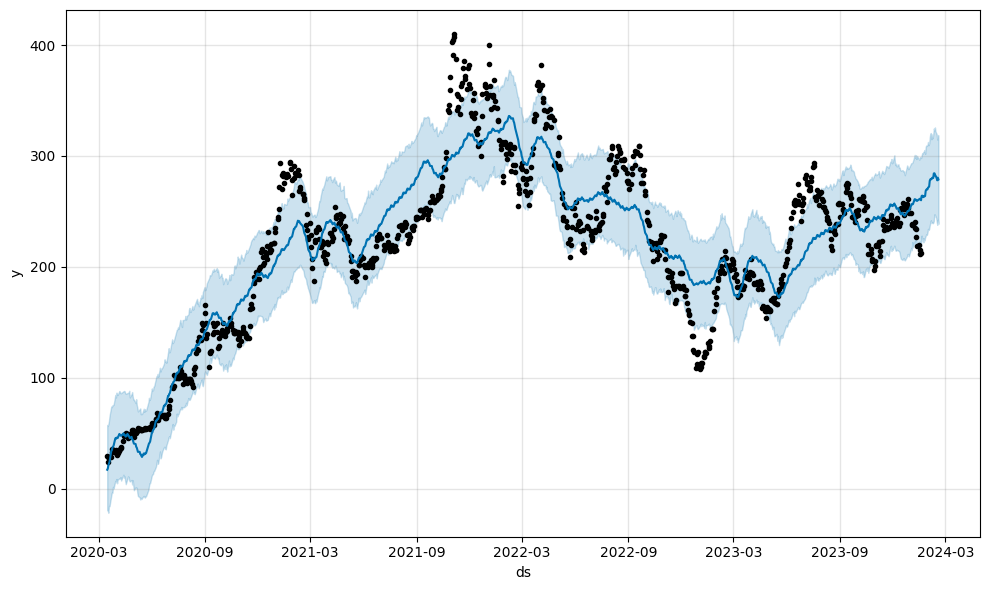

In [29]:
figure = m.plot(forecast, xlabel="ds", ylabel="y")

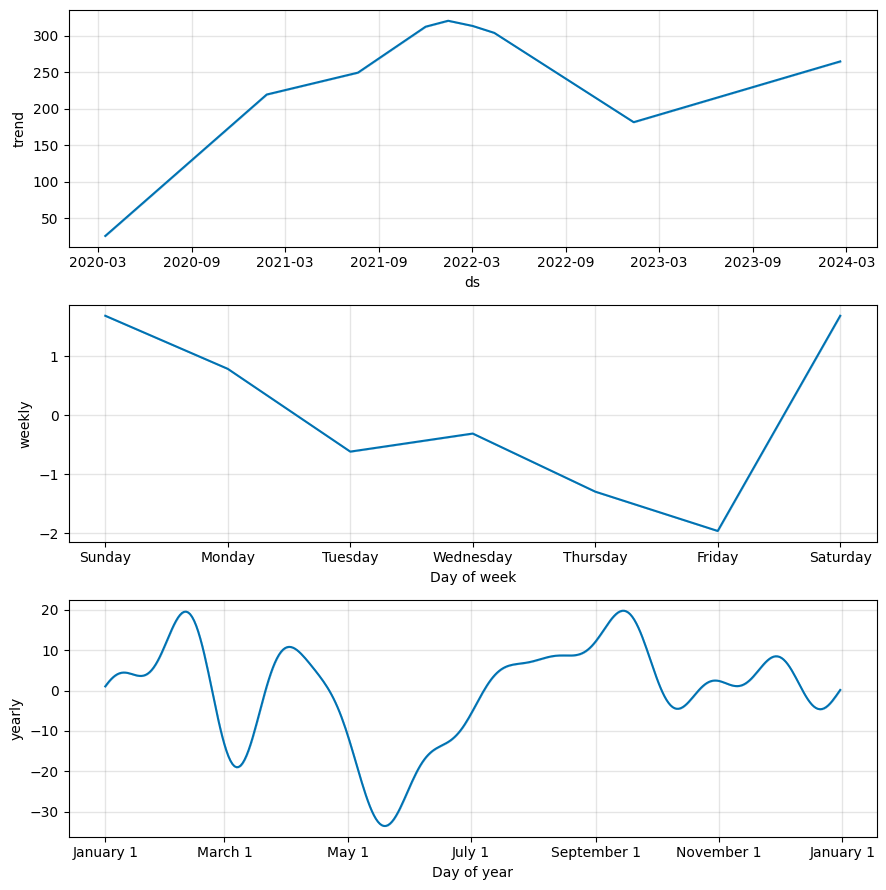

In [30]:
figure2 = m.plot_components(forecast)

# Downloading the Forecast data

In [31]:
from google.colab import files
forecast.to_csv("Tesla_forecast.csv")
files.download("Tesla_forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Forecasting Automation

### Amazon Stock Forecastin Automation

In [32]:
from datetime import datetime

In [34]:
end_time = datetime.now()
start_time = datetime(end_time.year - 2, end_time.month, end_time.day)

df = yf.download("amzn", start=start_time, end=end_time)

[*********************100%%**********************]  1 of 1 completed


In [35]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [38]:
df.to_csv("Amazon_one_year.csv")
files.download("Amazon_one_year.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24,139.000000,144.945007,135.352005,144.544006,144.544006,155624000
2022-01-25,142.242493,143.600006,138.145004,139.985992,139.985992,90824000
2022-01-26,144.750000,145.184998,137.318497,138.872498,138.872498,95602000
2022-01-27,140.800003,144.243500,139.350006,139.637497,139.637497,77516000
2022-01-28,140.860504,143.998001,137.929504,143.977997,143.977997,74392000
...,...,...,...,...,...,...
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400


In [40]:
df.reset_index(inplace=True)

In [41]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-24,139.000000,144.945007,135.352005,144.544006,144.544006,155624000
1,2022-01-25,142.242493,143.600006,138.145004,139.985992,139.985992,90824000
2,2022-01-26,144.750000,145.184998,137.318497,138.872498,138.872498,95602000
3,2022-01-27,140.800003,144.243500,139.350006,139.637497,139.637497,77516000
4,2022-01-28,140.860504,143.998001,137.929504,143.977997,143.977997,74392000
...,...,...,...,...,...,...,...
495,2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300
496,2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600
497,2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400
498,2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200


In [45]:
px.area(df, x="Date", y="Close", title="Amazon Stock")


The automation process involves either repeating the existing code or replacing datasets and ticker symbols of companies to obtain stock data. This streamlined approach enables rapid data visualization and forecasting of stock prices, typically taking just a minute to execute. The simplicity lies in the ease of code repetition or substitution, allowing for quick analysis and prediction with minimal effort.


**Mahfuz Islam Khan Jabed**

    Student, B.Sc in Computer Science & Engineering
    The Millennium University, Dhaka, Bangladesh

> [Github: @jabedkhanjb](https://www.github.com/jabedkhanjb)

> [Linkedin: @jabedkhanjb](https://www.linkedin.com/in/jabedkhanjb)




